## Example notebook for inspecting campbellsci files

In [120]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import mpld3 

%matplotlib inline
mpld3.enable_notebook()

In [121]:
path = '../../CloudStation/LoggerNet/'
datafiles=['CR1000_Table1.dat',
           'CR1000_Table2.dat',
           'CR5000_onemin.dat',
           'CR5000_flux.dat',
           'CL06_CR1000_IP_Table1.dat',
           'Wash_Strm_CR200_IP_Table1.dat',
           'Upper WS CR200_Table1.dat'
          ]

In [126]:
def read_campbellsci(path, datafile):
    filename = path + datafile
    df = pd.read_csv(filename, skiprows=[0,2,3], index_col=0, parse_dates=True)
    f = open(filename, 'r')
    lines = f.readlines()
    f.close()
    UnitsLine = lines[2]
    
    units = UnitsLine.replace('"','').split(',')
    if len(df)>60*24*3:
        df = df.resample('1H', how='mean')
    return df, units[1:]

def select_param(datafile):
    global df
    global units
    df, units = read_campbellsci(path, datafile)
    paramW.options = list(df.columns)

def plot_param(param):
    global df
    global units
    fig, ax = plt.subplots()
    df[param].plot(figsize=(10,5), marker='o', ax=ax)
    ax.set_ylabel(units[df.columns.get_loc(param)])
    plt.title(param + ' (time in UTC)')

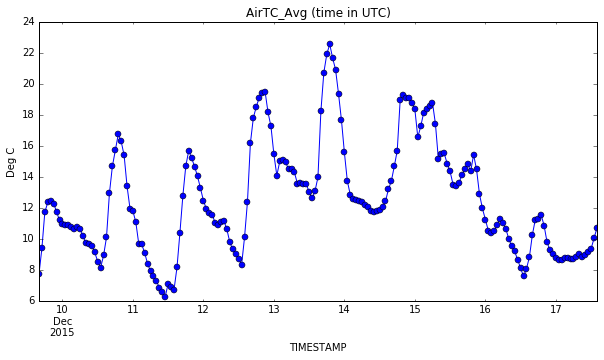

In [127]:
scW = widgets.Select(options=datafiles)
init = scW.value
paramW = widgets.Select(options=[])
i = widgets.interactive(select_param, datafile=scW)
j = widgets.interactive(plot_param, param=paramW)
display(i)
display(j)